In [1]:
#############
# 800 Hz
# hatasiz ariza yok label 1 ve degeri 1
# w0_test = '2023-06-01T00:00:00.359'
# w1_test = '2023-09-22T23:59:00.359'

# 800 Hz - Yuk Tetiklemeli
# ariza 
# w0_test = '2023-09-23T07:33:00.359'
# w1_test = '2023-10-02T05:59:59.359'
# normal
# w0_test = '2023-10-02T06:01:00.359'
# w1_test = '2023-10-03T23:59:00.359'

# 800 Hz - Zaman Bazli 
# ariza 
# w0_test = '2023-12-06T08:08:00.359'
# w0_test = '2023-12-06T09:30:00.359'  # 08.08 ILE 9:30 ARASINDA OLCUMLERDE COK FAZLA BOSTA OLCUM VAR O SEBEPLE 08:08 DEGIL 09:30 BASLANGIC KABUL EDILDI 
# w1_test = '2023-12-06T11:55:00.359'  # NOT 112 ADET  NOT ILK 40 ADET PAS GECILEBILINIR IKINCI ZAMANDAN ITIBAREN 74 ADET
# normal
# w0_test = '2023-11-10T20:00:00.359'
# w1_test = '2023-11-11T08:40:00.359'  # NOT 469 ADET



# 6400 Hz - Yuk Tetiklemeli
# ariza 
# w0_test  = '2023-12-06T14:20:00.359'
# w1_test  = '2023-12-06T16:59:00.359' # NOT .. ADET
# normal
# w0_test = '2023-11-19T00:00:00.359'
# w1_test = '2023-11-20T14:59:00.359'   # NOT 384 ADET


# 6400 Hz - Zaman Bazli 
# ariza 
# w0_test = '2023-12-06T12:00:00.359'
# w1_test = '2023-12-06T14:19:00.359' # NOT 52 ADET
# normal
# w0_test = '2023-11-11T08:42:00.359'
# w1_test = '2023-11-12T23:59:59.359' # NOT 434 ADET

#############

In [5]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time


import gc
import sys

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, Activation

%matplotlib inline

import keras
import keras.backend as K
from keras.layers.core import Activation
from tensorflow import keras


In [6]:
sequence_length = 8

In [22]:
import pandas as pd 

import datetime
from os import chdir, mkdir, open,listdir, getcwd, path, rmdir,makedirs


df = pd.read_csv('datasetAllData.csv')
data = df.copy()


In [8]:
data.index = pd.to_datetime(data["createdAt"].squeeze(), format = "%Y-%m-%dT%H:%M:%S.%fZ")

In [9]:
data.head()

,Unnamed: 0,Id,createdAt,MEASUREMENT_START_TIME,MEASUREMENT_START_UNIXTIME,CHUNK_COUNT,CALIBRATED_SAMPLINGRATE,device,gateway,TEMPERATURE,...,PEAK_TO_PEAK_2,PEAK_TO_PEAK_3,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data
createdAt,,,,,,,,,,,,,,,,,,,,,
2023-01-26 10:20:57.940,0,63d25409e3e9ba0023776a97,2023-01-26T10:20:57.940000Z,20:15:26:22:01:1970,1887323,8,13440,CA:B8:31:00:00:21,CA:B8:28:00:00:82,29.14,...,3.905884,3.999512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-26 10:51:02.262,1,63d25b16e3e9ba0023776aa4,2023-01-26T10:51:02.262000Z,20:45:30:22:01:1970,1889127,8,13449,CA:B8:31:00:00:21,CA:B8:28:00:00:82,33.43,...,3.965149,3.999512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-26 11:21:03.973,2,63d2621fe3e9ba0023776ab1,2023-01-26T11:21:03.973000Z,21:15:32:22:01:1970,1890929,8,13440,CA:B8:31:00:00:21,CA:B8:28:00:00:82,33.18,...,1.719666,1.246338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-26 12:03:02.674,3,63d26bf6e3e9ba0023776ac5,2023-01-26T12:03:02.674000Z,21:57:33:22:01:1970,1893450,8,13440,CA:B8:31:00:00:21,CA:B8:28:00:00:82,39.89,...,3.999512,3.965637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-26 12:33:05.446,4,63d27301e3e9ba0023776ad6,2023-01-26T12:33:05.446000Z,22:27:38:22:01:1970,1895255,8,13431,CA:B8:31:00:00:21,CA:B8:28:00:00:82,38.57,...,3.735413,3.999512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.tail()

,Unnamed: 0,Id,createdAt,MEASUREMENT_START_TIME,MEASUREMENT_START_UNIXTIME,CHUNK_COUNT,CALIBRATED_SAMPLINGRATE,device,gateway,TEMPERATURE,...,PEAK_TO_PEAK_2,PEAK_TO_PEAK_3,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data
createdAt,,,,,,,,,,,,,,,,,,,,,
2023-12-09 00:56:38.164,4522,6573bb4699caed003bff2920,2023-12-09T00:56:38.164000Z,12:14:05:03:01:1970,216843,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,43.32,...,1.195068,0.738281,2.90,2.91,0.0,0.0,1.07,1.0,1816.35,102.0
2023-12-09 01:35:51.789,4523,6573c47799caed003bff292c,2023-12-09T01:35:51.789000Z,12:53:27:03:01:1970,219205,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,38.46,...,0.468018,0.182373,2.78,2.75,0.0,0.0,1.01,1.0,2353.45,102.0
2023-12-09 02:36:18.352,4524,6573d2a299caed003bff295c,2023-12-09T02:36:18.352000Z,13:53:45:03:01:1970,222823,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,42.55,...,1.232666,0.418457,2.71,2.71,0.0,0.0,1.04,1.0,3626.79,102.0
2023-12-09 13:02:46.849,4525,6574657699caed003bff2a83,2023-12-09T13:02:46.849000Z,00:20:14:04:01:1970,260411,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,28.03,...,0.417969,0.167480,2.78,2.98,0.0,0.0,12.02,1.0,92.07,102.0
2023-12-09 13:54:51.890,4526,657471ab99caed003bff2a8d,2023-12-09T13:54:51.890000Z,00:11:26:01:01:1970,683,1,821,CA:B8:31:00:00:21,CA:B8:28:00:00:82,32.83,...,0.505371,0.589600,0.00,0.00,0.0,0.0,1.01,1.0,3124.60,102.0


In [11]:
def gen_sequence(id_df, seq_length, seq_cols):
  
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [12]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [13]:
cols1 = ['CLEARANCE_1', 'CLEARANCE_2', 'CLEARANCE_3', 'CREST_1', 'CREST_2', 'CREST_3', 'GRMS_1', 'GRMS_2', 'GRMS_3','KURTOSIS_1','KURTOSIS_2','KURTOSIS_3','SKEWNESS_1','SKEWNESS_2','SKEWNESS_3', 'TEMPERATURE','PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2','PEAK_TO_PEAK_3']

# cols1 = ['CLEARANCE_1', 'CLEARANCE_2', 'CLEARANCE_3', 'CREST_1', 'CREST_2', 'CREST_3', 'GRMS_1', 'GRMS_2', 'GRMS_3','KURTOSIS_1','KURTOSIS_2','KURTOSIS_3','SKEWNESS_1','SKEWNESS_2','SKEWNESS_3', 'TEMPERATURE','VRMS_1', 'VRMS_2', 'VRMS_3', 'PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2','PEAK_TO_PEAK_3']
#cols2 = ['TEMPERATURE','VRMS_1', 'VRMS_2', 'VRMS_3', 'PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2','PEAK_TO_PEAK_3']

cols2 = ['0_Data','1_Data','5_Data','7_Data']

cols1.extend(cols2)

# R PHAZE CURRENT, S PHASE CURRENT, SERVO TORQ, CYCLE TIME # cols2 = ['0_Data','1_Data','5_Data','7_Data']

# NOT 'VRMS_1', 'VRMS_2', 'VRMS_3',  silindi cols1 de cunku surekli sifir

# Burdan

In [23]:
#**********************
# belli araligi alma
# w0 = '2023-02-01T00:00:00.359'
# w1 = '2023-02-08T23:59:00.359'
# testArea = data.iloc[np.where(np.logical_and(data.index < pd.to_datetime(w0), data.index<= pd.to_datetime(w1)))]

train_data = data.copy() # tumunu aldık x araligi ok y aralıgi nok diyebiliyoruz
# test_data = data.iloc[np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1))].copy() bu olsaydı belli bir araligi alacaktik ama farklı olan x ve y araligin, alamayacaktik

# hatasiz ariza yok label 1 ve degeri 1
w0 = '2023-10-02T20:01:00.359'
#w0 = '2023-10-03T00:01:00.359'
w1 = '2023-10-03T15:59:00.359'
train_data['label1'] = np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1), 1, 0)
print("OK sinyal adet ",train_data.iloc[np.where(train_data['label1'] ==1)].shape[0])

# hatali ariza var label 2 ve degeri 1
w0 = '2023-09-23T07:33:00.359' #23.09.2023  07:32:19
w1 = '2023-09-23T08:29:59.359'
train_data['label2'] = np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1), 1, 0)
print("NOK sinyal adet ",train_data.iloc[np.where(train_data['label2'] ==1)].shape[0])

train_data = train_data.iloc[:, 8:]

train_data.dropna(inplace=True)

# hatali ve arizali olan tarihler bilestirilir
train_data = train_data.iloc[np.where(np.logical_or(train_data['label1'] ==1,train_data['label2'] ==1 ))[0]]
train_data = train_data.iloc[np.where(np.logical_and(train_data['0_Data'] > 1,train_data['1_Data'] > 1 ))[0]]
print("TOPLAM sinyal adet ",train_data.shape)



OK sinyal adet  346
NOK sinyal adet  35
TOPLAM sinyal adet  (306, 39)


In [24]:
# akim degeri 0 olanlar kaldi mi
train_data.iloc[np.where(np.logical_or(train_data['0_Data'] < 1,train_data['1_Data'] < 1 ))[0]]

,gateway,TEMPERATURE,CLEARANCE_1,CLEARANCE_2,CLEARANCE_3,CREST_1,CREST_2,CREST_3,GRMS_1,GRMS_2,...,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data,label1,label2


In [25]:
df.to_csv('datasetTrain.csv')
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [19]:
cols_normalize = train_data.drop(['label1','label2'], axis=1).columns 
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_data[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_data.index)
join_df = train_data[train_data.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_data.columns)
train_df.dropna(inplace=True)
train_df.head()

C:\Users\ayhan.ozturk\AppData\Local\Temp\ipykernel_16132\2717978938.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cols_normalize = train_data.drop(['label1','label2'], axis=1).columns
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,TEMPERATURE,CLEARANCE_1,CLEARANCE_2,CLEARANCE_3,CREST_1,CREST_2,CREST_3,GRMS_1,GRMS_2,GRMS_3,...,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data,label1,label2
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-09-23 07:35:15.203,0.261134,0.059903,0.175462,0.098068,0.077693,0.271155,0.159057,0.470507,0.424452,0.302880,...,0.018868,0.021898,0.0,0.0,0.040671,0.0,0.039672,0.0,0,1
2023-09-23 07:53:05.861,0.244939,0.011121,0.588519,0.030862,0.030828,0.651083,0.076763,0.000000,0.000536,0.000000,...,0.014151,0.014599,0.0,0.0,0.046482,0.0,0.002632,0.0,0,1
2023-09-23 07:53:39.218,0.240891,0.075214,0.151331,0.059640,0.126374,0.243475,0.104851,0.446773,0.430994,0.305211,...,0.000000,0.000000,0.0,0.0,0.047773,0.0,0.000765,0.0,0,1
2023-09-23 07:54:26.014,0.241903,0.137775,0.157813,0.145913,0.201575,0.191581,0.233080,0.377344,0.393290,0.265068,...,1.000000,0.043796,0.0,0.0,0.037444,0.0,0.004389,0.0,0,1
2023-09-23 08:11:22.670,0.268219,0.108334,0.199930,0.115222,0.188840,0.281180,0.208424,0.431130,0.411305,0.297102,...,0.070755,0.087591,0.0,0.0,0.043254,0.0,0.269447,0.0,0,1


In [20]:
import joblib
scaler_filename = '800Hz_AKIM_VAR_scaler.save'
joblib.dump(min_max_scaler, scaler_filename) 

['800Hz_AKIM_VAR_scaler.save']

In [21]:
print(cols1)

['CLEARANCE_1', 'CLEARANCE_2', 'CLEARANCE_3', 'CREST_1', 'CREST_2', 'CREST_3', 'GRMS_1', 'GRMS_2', 'GRMS_3', 'KURTOSIS_1', 'KURTOSIS_2', 'KURTOSIS_3', 'SKEWNESS_1', 'SKEWNESS_2', 'SKEWNESS_3', 'TEMPERATURE', 'PEAK_1', 'PEAK_2', 'PEAK_3', 'SUM_1', 'SUM_2', 'SUM_3', 'PEAK_TO_PEAK_1', 'PEAK_TO_PEAK_2', 'PEAK_TO_PEAK_3', '0_Data', '1_Data', '5_Data', '7_Data']


# Confusion matrix
# https://www.veribilimiokulu.com/hata-matrisini-confusion-matrix-yorumlama/

# Doğruya doğru demek (True Positive – TP) DOĞRU
# Yanlışa yanlış demek (True Negative – TN) DOĞRU
# Doğruya yanlış demek (False Positive – FP) YANLIŞ
# Yanlışa doğru demek(False Negative – FN) YANLIŞ


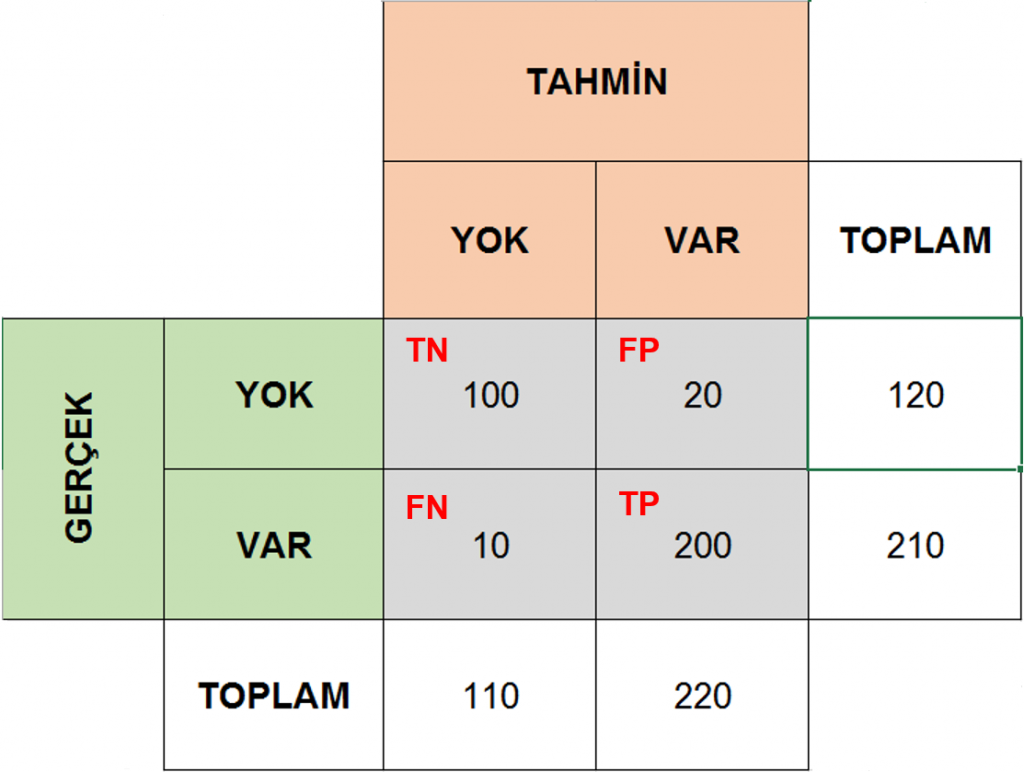

# TEST 
(MEVCUT SCALE WEIGHT VE MODEL ILE (HAFIZADAN ALINMADAN EGITIMDEKI DEGERLERLE)

In [22]:
import joblib
scaler_filename = '800Hz_AKIM_VAR_scaler.save'
min_max_scaler_test = joblib.load(scaler_filename)

In [26]:
# OK NOK BERABER
#**********************
# belli araligi alma
# w0 = '2023-02-01T00:00:00.359'
# w1 = '2023-02-08T23:59:00.359'
# testArea = data.iloc[np.where(np.logical_and(data.index < pd.to_datetime(w0), data.index<= pd.to_datetime(w1)))]

test_data = data.copy() # tumunu aldık x araligi ok y aralıgi nok diyebiliyoruz
# test_data = data.iloc[np.where(np.logical_and(data['createdAt']>=w0, data['createdAt']<=w1))].copy() bu olsaydı belli bir araligi alacaktik ama farklı olan x ve y araligin, alamayacaktik

#############
# 800 Hz
# hatasiz ariza yok label 1 ve degeri 1
# w0_test = '2023-06-01T00:00:00.359'
# w1_test = '2023-09-22T23:59:00.359'

# 800 Hz - Yuk Tetiklemeli
# ariza 
# w0_test = '2023-09-23T08:30:00.359'
# w1_test = '2023-10-02T05:59:59.359'
# normal
# w0_test = '2023-10-02T06:01:00.359'
# w1_test = '2023-10-03T23:59:00.359'

# 800 Hz - Zaman Bazli 
# ariza 
# w0_test = '2023-12-06T08:08:00.359'
# w0_test = '2023-12-06T09:30:00.359'  # 08.08 ILE 9:30 ARASINDA OLCUMLERDE COK FAZLA BOSTA OLCUM VAR O SEBEPLE 08:08 DEGIL 09:30 BASLANGIC KABUL EDILDI 
# w1_test = '2023-12-06T11:55:00.359'  # NOT 112 ADET  NOT ILK 40 ADET PAS GECILEBILINIR IKINCI ZAMANDAN ITIBAREN 74 ADET
# normal
# w0_test = '2023-11-10T20:00:00.359'
# w1_test = '2023-11-11T08:40:00.359'  # NOT 469 ADET



# 6400 Hz - Yuk Tetiklemeli
# ariza 
# w0_test  = '2023-12-06T14:20:00.359'
# w1_test  = '2023-12-06T16:59:00.359' # NOT .. ADET
# normal
# w0_test = '2023-11-19T00:00:00.359'
# w1_test = '2023-11-20T14:59:00.359'   # NOT 384 ADET


# 6400 Hz - Zaman Bazli 
# ariza 
# w0_test = '2023-12-06T12:00:00.359'
# w1_test = '2023-12-06T14:19:00.359' # NOT 52 ADET
# normal
# w0_test = '2023-11-11T08:42:00.359'
# w1_test = '2023-11-12T23:59:59.359' # NOT 434 ADET

#############

w0_test = '2023-06-01T00:00:00.359'
w1_test = '2023-09-22T23:59:00.359'

test_data['label1'] = np.where(np.logical_and(test_data['createdAt']>=w0_test, test_data['createdAt']<=w1_test), 1, 0)
print("OK sinyal adet ",test_data.iloc[np.where(test_data['label1'] ==1)].shape[0])

# hatali ariza var label 2 ve degeri 1


w0_test = '2023-09-23T08:30:00.359'
w1_test = '2023-10-02T05:59:59.359'

test_data['label2'] = np.where(np.logical_and(test_data['createdAt']>=w0_test, test_data['createdAt']<=w1_test), 1, 0)
print("NOK sinyal adet ",test_data.iloc[np.where(test_data['label2'] ==1)].shape[0])

test_data = test_data.iloc[:, 8:]

test_data.dropna(inplace=True)

# hatali ve arizali olan tarihler bilestirilir
test_data = test_data.iloc[np.where(np.logical_or(test_data['label1'] ==1,test_data['label2'] ==1 ))[0]]

# akimda fazlardan biri sıfır olsada teste girsin diye istenirse aktif edilebilinir
#test_data = test_data.iloc[np.where(np.logical_and(test_data['0_Data'] > 1,test_data['1_Data'] > 1 ))[0]]
print("TOPLAM sinyal adet ",test_data.shape)

OK sinyal adet  289
NOK sinyal adet  37
TOPLAM sinyal adet  (282, 39)


In [27]:
df.to_csv('datasetTest.csv')
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [26]:
cols_normalize_test = test_data.drop(['label1','label2'], axis=1).columns

norm_train_df_test = pd.DataFrame(min_max_scaler_test.transform(test_data[cols_normalize_test]),   # fit_transform degil yeniden scale degeri olmasin diye sadece transform
                             columns=cols_normalize_test, 
                             index=test_data.index)
join_df_test = test_data[test_data.columns.difference(cols_normalize_test)].join(norm_train_df_test)
test_df = join_df_test.reindex(columns = test_data.columns)
test_df.dropna(inplace=True)
test_df.head()

C:\Users\ayhan.ozturk\AppData\Local\Temp\ipykernel_16132\3173531823.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cols_normalize_test = test_data.drop(['label1','label2'], axis=1).columns
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,TEMPERATURE,CLEARANCE_1,CLEARANCE_2,CLEARANCE_3,CREST_1,CREST_2,CREST_3,GRMS_1,GRMS_2,GRMS_3,...,0_Data,1_Data,3_Data,4_Data,5_Data,6_Data,7_Data,8_Data,label1,label2
"(createdAt,)",,,,,,,,,,,,,,,,,,,,,
2023-06-22 21:35:40.735,1.221660,0.085837,0.157288,0.065570,0.134092,0.182443,0.095788,0.283574,0.147584,0.127920,...,0.339623,0.299270,0.0,0.0,0.541640,0.0,0.484871,0.0,1,0
2023-06-23 07:22:25.521,0.956478,0.107194,0.284384,0.148586,0.172307,0.398526,0.294470,0.252655,0.180055,0.122357,...,-0.009434,0.007299,0.0,0.0,0.484829,0.0,0.888679,0.0,1,0
2023-06-23 20:01:39.441,1.214575,0.178769,0.246937,0.083265,0.310081,0.322076,0.153419,0.306456,0.225140,0.166720,...,0.466981,0.700730,0.0,0.0,0.831504,0.0,6.445885,0.0,1,0
2023-06-23 20:31:48.159,1.186235,0.028722,0.049432,0.063590,0.059249,0.087211,0.121116,0.829094,0.775258,0.709731,...,0.150943,1.138686,0.0,0.0,0.038735,0.0,0.485885,0.0,1,0
2023-06-23 21:31:17.219,1.178138,0.047247,0.028870,0.054875,0.054806,0.032496,0.101423,0.725178,0.746348,0.438372,...,0.122642,0.204380,0.0,0.0,0.052937,0.0,0.484046,0.0,1,0


In [64]:
x_train  = train_df[cols1]
y_train = train_df[['label2']]

x_test  = test_df[cols1]
y_test  = test_df[['label2']]

In [69]:
def mean_absolute_percentage_error(true, pred):
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

def mean_squared_error(true, pred):
    squared_error = np.square(true - pred) 
    sum_squared_error = np.sum(squared_error)
    mse_loss = sum_squared_error / true.size
    return mse_loss

def relative_absolute_error(true, pred):
    true_mean = np.mean(true)
    squared_error_num = np.sum(np.abs(true - pred))
    squared_error_den = np.sum(np.abs(true - true_mean))
    rae_loss = squared_error_num / squared_error_den
    return rae_loss

def relative_squared_error(true, pred):
    true_mean = np.mean(true)
    squared_error_num = np.sum(np.square(true - pred))
    squared_error_den = np.sum(np.square(true - true_mean))
    rse_loss = squared_error_num / squared_error_den
    return rse_loss

# Logistic regression

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error w

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       245
           1       0.94      0.41      0.57        37

    accuracy                           0.92       282
   macro avg       0.93      0.70      0.76       282
weighted avg       0.92      0.92      0.90       282



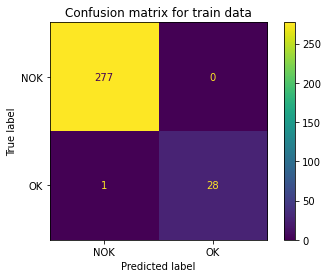

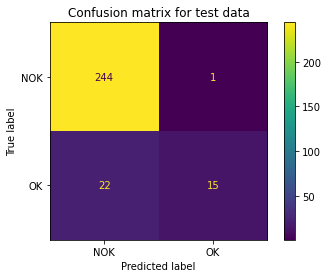

(282, 1)
(282, 1)
Mean absolute error : 0.08156028368794327
Mean sqrt error : label2    0.08156
dtype: float64
Mean sqrt error : 0.08156028368794327
Relative absolute error : label2    0.35775
dtype: float64
Relative sqrt error : label2    0.715499
dtype: float64


C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [91]:
# x_train, x_test, y_train, y_test = train_test_split(train_df[cols1], train_df[['label2']],test_size=.1,random_state =123)


#importing logistic regression to create a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


#Giving training to model by training data
model.fit(x_train,y_train)

#predicting results on test data
y_pred_train=model.predict(x_train)

y_pred_test=model.predict(x_test)


#importing confusion_matrix,classificatio_report and accuracy_report from metrics to check model performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
class_report_test=classification_report(y_test,y_pred_test)   #to get classification reprt
acc_scr_test=accuracy_score(y_test,y_pred_test)*100   #to get accuracty_score
con_matrix_test=confusion_matrix(y_test,y_pred_test)  #to get confusion_,atrix

class_report_train=classification_report(y_train,y_pred_train)   #to get classification reprt
acc_scr_train=accuracy_score(y_train,y_pred_train)*100   #to get accuracty_score
con_matrix_train=confusion_matrix(y_train,y_pred_train)  #to get confusion_,atrix

print(class_report_test)


#confusion matrics
class_names=["NOK","OK"]
from sklearn.metrics import ConfusionMatrixDisplay

#confusion matrix for train data
conf_train_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_train,display_labels=class_names)
conf_train_disp.plot()
plt.title("Confusion matrix for train data")


#confusion matrix for test data
conf_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_test,display_labels=class_names)
conf_test_disp.plot()
plt.title("Confusion matrix for test data")

plt.show();


# Python program for calculating Mean Absolute 
# Error using sklearn 
  
# import the module 
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse
  
# calculate MAE, MSE

# display 
print(y_test.values.shape)
print(y_pred_test.reshape(-1,1).shape)
print("Mean absolute error : " + str(mae(y_test,y_pred_test.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mean_squared_error(y_test,y_pred_test.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mse(y_test,y_pred_test.reshape(-1,1)) )) 
print("Relative absolute error : " + str(relative_absolute_error(y_test,y_pred_test.reshape(-1,1)) )) 
print("Relative sqrt error : " + str(relative_squared_error(y_test,y_pred_test.reshape(-1,1)) )) 

# KNN classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

# import the module 
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse

#training to model
knn_model.fit(x_train,y_train)

knn_pred_train=knn_model.predict(x_train)

knn_pred_test=knn_model.predict(x_test)


acc_scr_knn_train=accuracy_score(y_train,knn_pred_train)

acc_scr_knn_test=accuracy_score(knn_pred_test,y_test)


acc_scr_knn_train=accuracy_score(y_train,knn_pred_train)

acc_scr_knn_test=accuracy_score(knn_pred_test,y_test)

print("accuracy_score of train data is: ",acc_scr_knn_train)

print("accuracy_score for test data is: ",acc_scr_knn_test)

n_list=[3,4,5,7,9,10,12,14,15,16,18,20]
train_accuracy_scr_list=[]
test_accuracy_scr_list=[]
val_accuracy_scr_list=[]

test_accuracy_mae_list=[]
test_accuracy_mse_list=[]

test_rae_list=[]
test_rse_list=[]


for n in n_list:
    kn_model=KNeighborsClassifier(n_neighbors=n,algorithm="kd_tree")
    kn_model.fit(x_train,y_train)

    knn_test_pred=kn_model.predict(x_test) #prediction on test data

    knn_train_pred=kn_model.predict(x_train) #prediction on train data
    
    test_accuracy_scr_list.append(accuracy_score(y_test,knn_test_pred))    #accuracy score list for each value of k for test data

    train_accuracy_scr_list.append(accuracy_score(y_train,knn_train_pred))    #accuracy score list for each value of k for train data
    
    test_accuracy_mae_list.append(mae(y_test,knn_test_pred))
    test_accuracy_mse_list.append(mse(y_test,knn_test_pred))
    test_rae_list.append(relative_absolute_error(y_test,knn_test_pred.reshape(-1,1)))
    test_rse_list.append(relative_squared_error(y_test,knn_test_pred.reshape(-1,1)))

#creating dataframe for accuracy scores
df=pd.DataFrame({"k":n_list,
                 "accuracy_score_train":train_accuracy_scr_list,

                 "accuracy_score_test":test_accuracy_scr_list,
                 "mae_test": test_accuracy_mae_list,
                 "mse_test": test_accuracy_mse_list,
                 "rae_test": test_rae_list,
                 "rse_test": test_rse_list,                 
                })
df

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error w

accuracy_score of train data is:  0.9901960784313726
accuracy_score for test data is:  0.8829787234042553


C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error w

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only sup

,k,accuracy_score_train,accuracy_score_test,mae_test,mse_test,rae_test,rse_test
0,3,0.986928,0.886525,0.113475,0.113475,label2 0.497739 dtype: float64,label2 0.995477 dtype: float64
1,4,0.986928,0.886525,0.113475,0.113475,label2 0.497739 dtype: float64,label2 0.995477 dtype: float64
2,5,0.990196,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
3,7,0.980392,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
4,9,0.980392,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
5,10,0.973856,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
6,12,0.970588,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
7,14,0.967320,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
8,15,0.970588,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64
9,16,0.967320,0.882979,0.117021,0.117021,label2 0.513293 dtype: float64,label2 1.026586 dtype: float64


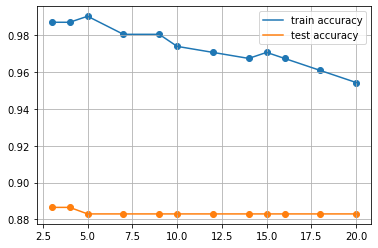

In [85]:
plt.plot(n_list,train_accuracy_scr_list,label='train accuracy')    #plotting accuracy score for all value of k
plt.scatter(n_list,train_accuracy_scr_list) #adding scatters

plt.plot(n_list,test_accuracy_scr_list,label='test accuracy') #plotting accuracy score for all value of k
plt.scatter(n_list,test_accuracy_scr_list)    #adding scatters
plt.legend();   #adding legends
plt.grid();

# SVM classifier

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error w

accuracy score for train data is 1.0%
accuracy score for test data is 0.8900709219858156%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       245
           1       0.88      0.19      0.31        37

    accuracy                           0.89       282
   macro avg       0.88      0.59      0.63       282
weighted avg       0.89      0.89      0.86       282

(282, 1)
(282, 1)
Mean absolute error : 0.1099290780141844
Mean sqrt error : label2    0.109929
dtype: float64
Mean sqrt error : 0.1099290780141844
Relative absolute error : label2    0.482184
dtype: float64
Relative sqrt error : label2    0.964368
dtype: float64


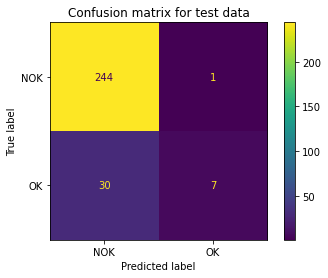

In [87]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train) #training to model

svc_train_pred=svc_model.predict(x_train) #prediction on train data

svc_test_pred=svc_model.predict(x_test)   #prediction on test data

acc_scr_svc_train=accuracy_score(y_train,svc_train_pred)  #accuracy score for train data

acc_scr_svc_test=accuracy_score(svc_test_pred,y_test)     #accuracy score for test data

print(f"accuracy score for train data is {acc_scr_svc_train}%")


print(f"accuracy score for test data is {acc_scr_svc_test}%")


#classification report
class_report_svc_test=classification_report(y_test,svc_test_pred)   #to get classification reprt
print(class_report_svc_test)

from sklearn.metrics import ConfusionMatrixDisplay
#confusion matrix
con_matrix_svc_test=confusion_matrix(y_test,svc_test_pred)  #to get confusion_matrix
#confusion matrix for train data
conf_svc_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_svc_test,display_labels=class_names)
conf_svc_test_disp.plot()
plt.title("Confusion matrix for test data")

# Python program for calculating Mean Absolute 
# Error using sklearn 
  
# import the module 
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse
  
# calculate MAE, MSE

# display 
print(y_test.values.shape)
print(svc_test_pred.reshape(-1,1).shape)
print("Mean absolute error : " + str(mae(y_test,svc_test_pred.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mean_squared_error(y_test,svc_test_pred.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mse(y_test,svc_test_pred.reshape(-1,1)) )) 
print("Relative absolute error : " + str(relative_absolute_error(y_test,svc_test_pred.reshape(-1,1)) )) 
print("Relative sqrt error : " + str(relative_squared_error(y_test,svc_test_pred.reshape(-1,1)) )) 

# Random forest classifier

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\AppData\Local\Temp\ipykernel_16132\2844528567.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)  #model training
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error wil

accuracy score for train data is 1.0%
accuracy score for test data is 0.9184397163120568%
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       245
           1       0.94      0.41      0.57        37

    accuracy                           0.92       282
   macro avg       0.93      0.70      0.76       282
weighted avg       0.92      0.92      0.90       282

(282, 1)
(282, 1)
Mean absolute error : 0.08156028368794327
Mean sqrt error : label2    0.08156
dtype: float64
Mean sqrt error : 0.08156028368794327
Relative absolute error : label2    0.35775
dtype: float64
Relative sqrt error : label2    0.715499
dtype: float64


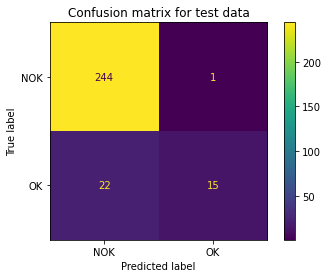

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)  #model training


rf_train_pred=rf_model.predict(x_train)

rf_test_pred=rf_model.predict(x_test)

acc_scr_rf_train=accuracy_score(y_train,rf_train_pred)  #accuracy score for train data

acc_scr_rf_test=accuracy_score(rf_test_pred,y_test)     #accuracy score for test data

print(f"accuracy score for train data is {acc_scr_rf_train}%")



print(f"accuracy score for test data is {acc_scr_rf_test}%")

#classification report
class_report_rf_test=classification_report(y_test,rf_test_pred)   #to get classification reprt
print(class_report_rf_test)

from sklearn.metrics import ConfusionMatrixDisplay
#confusion matrix
con_matrix_rf_test=confusion_matrix(y_test,rf_test_pred)  #to get confusion_matrix
#confusion matrix for train data
conf_rf_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_rf_test,display_labels=class_names)
conf_rf_test_disp.plot()
plt.title("Confusion matrix for test data")


# Python program for calculating Mean Absolute 
# Error using sklearn 
  
# import the module 
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse
  
# calculate MAE, MSE

# display 
print(y_test.values.shape)
print(rf_test_pred.reshape(-1,1).shape)
print("Mean absolute error : " + str(mae(y_test,rf_test_pred.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mean_squared_error(y_test,rf_test_pred.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mse(y_test,rf_test_pred.reshape(-1,1)) )) 
print("Relative absolute error : " + str(relative_absolute_error(y_test,rf_test_pred.reshape(-1,1)) )) 
print("Relative sqrt error : " + str(relative_squared_error(y_test,rf_test_pred.reshape(-1,1)) )) 

# Desicion Tree classifier

C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ayhan.ozturk\.conda\envs\udemy\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'fra

accuracy score for train data is 1.0%
accuracy score for test data is 0.9113475177304965%
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       245
           1       0.93      0.35      0.51        37

    accuracy                           0.91       282
   macro avg       0.92      0.67      0.73       282
weighted avg       0.91      0.91      0.89       282

(282, 1)
(282, 1)
Mean absolute error : 0.08865248226950355
Mean sqrt error : label2    0.088652
dtype: float64
Mean sqrt error : 0.08865248226950355
Relative absolute error : label2    0.388858
dtype: float64
Relative sqrt error : label2    0.777716
dtype: float64


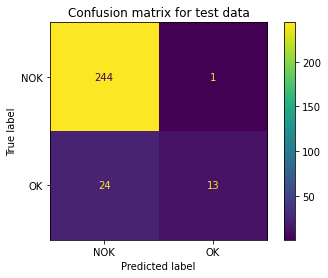

In [90]:
from sklearn.tree import DecisionTreeClassifier #importing Decision tree
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)  #model training


dt_train_pred=dt_model.predict(x_train)

dt_test_pred=dt_model.predict(x_test)

acc_scr_dt_train=accuracy_score(y_train,dt_train_pred)  #accuracy score for train data

acc_scr_dt_test=accuracy_score(y_test,dt_test_pred)     #accuracy score for test data

print(f"accuracy score for train data is {acc_scr_dt_train}%")



print(f"accuracy score for test data is {acc_scr_dt_test}%")

#classification report
class_report_dt_test=classification_report(y_test,dt_test_pred)   #to get classification reprt
print(class_report_dt_test)

from sklearn.metrics import ConfusionMatrixDisplay
#confusion matrix
con_matrix_dt_test=confusion_matrix(y_test,dt_test_pred)  #to get confusion_matrix
#confusion matrix for train data
conf_dt_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_dt_test,display_labels=class_names)
conf_dt_test_disp.plot()
plt.title("Confusion matrix for test data")

# Python program for calculating Mean Absolute 
# Error using sklearn 
  
# import the module 
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse
  
# calculate MAE, MSE

# display 
print(y_test.values.shape)
print(dt_test_pred.reshape(-1,1).shape)
print("Mean absolute error : " + str(mae(y_test,dt_test_pred.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mean_squared_error(y_test,dt_test_pred.reshape(-1,1)) )) 
print("Mean sqrt error : " + str(mse(y_test,dt_test_pred.reshape(-1,1)) )) 
print("Relative absolute error : " + str(relative_absolute_error(y_test,dt_test_pred.reshape(-1,1)) )) 
print("Relative sqrt error : " + str(relative_squared_error(y_test,dt_test_pred.reshape(-1,1)) )) 